In [1]:
%matplotlib inline

# Анализ данных ДЗЗ: примеры


## Дмитрий Александрович Колесов (dmitry.kolesov@nextgis.ru)


### NextGIS

# О чем пойдет речь

 * Что это за такие "Данные аэрокосмической съемки"
 * Как их обрабатывать
 * На чем можно споткнуться
 * Где их брать

# Исторический обзор

* Появление аэрофотосьемки
* Ручное дешифрирование
* Многозональная (многоканальная) съемка


# Примеры задач

Применяется, в задачах, где нужно:
 
 * обследовать большие территории (например, экологические исследования региона/страны/Земли);
 * наземные исследования слишком дороги/опасны;
 * нужно быстрое реагирование (например, пожары);
 * ...

Сферы применения:

 * Нефтегазовая отрасль.
 * Экология.
 * Военное дело.
 * Сельское хозяйство.
 * ...

# Пара наших задач

# Поиск незаконных рубок леса

<img src="IMG/crop0.jpg" >

Приморский край, зимняя рубка. Распознать ее можно по более светлому пятну по сравнению с окружающим его участком. Сам участок помимо того, что поменял цвет, стал более "шершавый" на вид.

# [Поиск посадок марихуаны в Калифорнии](http://kolesov.nextgis.com/resource/100/display?base=osm-mapnik&lon=-123.8788&lat=40.1254&angle=0&zoom=15&styles=97,411,403,437,407,435,431,439,419,423,421,417,441,399,433,405,413,427,401,445,409,425,429,443,415,453,461,447,465,451,449,455,457,463,459,497,489,483,491,477,487,503,473,471,495,493,499,501,485,469,475,481,479,467,505,507,511,517,515,513,509,519,521,523,525,527,529,531,533,535,537,539,541,543,545,547,549,551,553,555,557,559,561,563)

<img src="IMG/KD2S.png"> 

[Да, почти на взлетном поле](http://kolesov.nextgis.com/resource/100/display?base=osm-mapnik&lon=-123.8191&lat=40.0840&angle=0&zoom=14&styles=97,99)

# Основы

# Солнечное излучение и датчик

<img src="IMG/Dos_img_1.jpg">
(Источник: http://gis-lab.info/qa/atcorr-dos.html)

# Многоканальные снимки

<img src="IMG/Reflectance.png" >

# Пространство признаков

<img src="IMG/feature_space.png" >

# Пример №1: Landsat-8, Владивосток

Спектральный канал | Длины волн | Разрешение (размер 1 пикселя)
----------------------|---------|---
Канал 1 — Побережья и аэрозоли (Coastal / Aerosol, New Deep Blue) | 0.433 — 0.453 мкм | 30 м
Канал 2 — Синий (Blue) | 0.450 — 0.515 мкм | 30 м
Канал 3 — Зелёный (Green) | 0.525 — 0.600 мкм | 30 м
Канал 4 — Красный (Red) | 0.630 — 0.680 мкм | 30 м
Канал 5 — Ближний ИК (Near Infrared, NIR) | 0.845 — 0.885 мкм | 30 м
Канал 6 — Ближний ИК (Short Wavelength Infrared, SWIR 2) | 1.560 — 1.660 мкм | 30 м
Канал 7 — Ближний ИК (Short Wavelength Infrared, SWIR 3) | 2.100 — 2.300 мкм | 30 м
Канал 8 — Панхроматический (Panchromatic, PAN) | 0.500 — 0.680 мкм | 15 м
Канал 9 — Перистые облака (Cirrus, SWIR) | 1.360 — 1.390 мкм | 30 м
Канал 10 — Дальний ИК (Long Wavelength Infrared, TIR1) |10.30 — 11.30 мкм |100 м
Канал 11 — Дальний ИК (Long Wavelength Infrared, TIR2) |11.50 — 12.50 мкм |	100 м

In [2]:
import numpy as np
import pandas as pd
points = pd.read_csv('rand.txt')
points.tail()

,class,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11
295,3,0.124330,0.104308,0.087843,0.071109,0.227926,0.151615,0.126195,0.095499,0.001104,301.609731,298.717191
296,3,0.170779,0.162608,0.140304,0.149554,0.156204,0.188347,0.180814,0.177649,0.001497,301.884576,299.011167
297,3,0.185673,0.176619,0.144328,0.131789,0.138194,0.173625,0.186556,0.136427,0.001202,302.764969,299.547586
298,3,0.139764,0.123717,0.108479,0.104651,0.129213,0.135126,0.107227,0.066594,0.001104,301.803804,299.365326
299,3,0.144279,0.122882,0.106369,0.102173,0.197205,0.173601,0.136795,0.075182,0.001129,301.558850,299.002856


In [3]:
y = points["class"]
X = points[['r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'r11']]

In [4]:
# Разбиваем на обучающее и тестовое множества:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Нормируем входные данные:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
# from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Подгоняем модель
pipe_lr = Pipeline([
        # ('pca', PCA(n_components=10)), 
        ('clf', LogisticRegression(random_state=1))])
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C': param_range, 'clf__penalty': ['l1', 'l2']}]
gs = GridSearchCV(estimator=pipe_lr, param_grid=param_grid,
    scoring='accuracy', cv=10)

gs = gs.fit(X, y)
print(gs.best_score_)
print(gs.best_params_)

clf = gs.best_estimator_
clf.fit(X_train, y_train)
print('Test accuracy: %.3f' % clf.score(X_test, y_test))

0.986666666667
{'clf__penalty': 'l2', 'clf__C': 1.0}
Test accuracy: 0.989


# Не все так плохо, если

* создать больше классов;
* аккуратнее выбирать обучающие примеры;
* выбирать примеры не с одного участка снимка, а разных;
* ...


# Подводные камни и как с ними бороться

### Модель, обученная на одной сцене обычно не годится для анализа другой:

 * Другое состояние атмосферы.
 * Произошли изменения земной поверности (растительность уже поменялась).
 
### Модель, хоршо работающая на одном участке снимка, не работает на другом:
 * Другое состояние атмосферы.
 * Иной рельеф.

# Состояние атмосферы. Атмосферная коррекция

<img src="IMG/Dos_img_1.jpg">


# Влияние рельефа. Топографическая коррекция

<img src="IMG/reflection.png" >

 
# Пространственная автокорреляция и обучение моделей

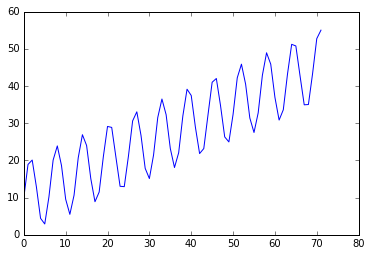

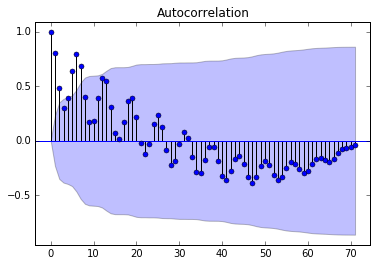

In [6]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
x = np.array(range(72))
y = 10 + 0.5*x + 10*np.sin(x)
plt.plot(x,y)
plot_acf(y);

# Пространственная автокорреляция

<img src="IMG/autocorrelation.png">

# Это может быть большой проблемой

<img src="IMG/denove.jpg" >

# Пример №2: генерация признаков

# Залесенные березой болота и зарастающие березой гари.

### NDVI

NDVI (Normalized Difference Vegetation Index) простой количественный показатель количества фотосинтетически активной биомассы.

Пусть NIR - отражение в ближней инфракрасной области спектра,
RED - отражение в красной области спектра, тогда:
$$
NDVI = \frac{NIR - RED}{NIR + RED}
$$


**Примеры значений**

 Тип объекта | Значение NDVI 
-------------|:--------------:
 Густая растительность | 0.7 
 Разреженная растительность | 0.5 
 Открытая почва | 0.025 
 Облака | 0 


"Сырые" ряды | "Низкие частоты"
--------------|---------------------
<img src="IMG/raw_ndvi1.png" > | <img src="IMG/filtered_ndvi1.png" >
Выборка значений «сырых» рядов NDVI, извлеченных непосредственно из MOD13 для: 1 - залесенных березой болот; 2 -  зарастающих березой гарей.| Пример кривых NDVI после удаления высокочастотных компонент для: 1 - залесенных березой болот; 2 - зарастающих березой гарей.


# Разделимость классов по коэффициентам разложения в ряд Фурье

<img src="IMG/separation.png" >

Пример разделимости классов по первым коэффициентам разложения в ряд Фурье для:
1 - залесенных березой болот; 2 -  зарастающих березой гарей.


# Вместо заключения

* В анализе ДЗЗ очень много интересных задач на любой вкус и любой сложности: математических, инженерных, физических, ... .

# Полезные ссылки

 * Сайт космической программы Landsat: http://landsat.gsfc.nasa.gov
 * Сайт космической программы MODIS: http://modis.gsfc.nasa.gov
 * Сайт геологической службы США: **https://earthexplorer.usgs.gov/**, http://www.usgs.gov
